--------------------------------------------------
Initial parameters: 1, 3, 65
Running iteration 1 with parameters: 1, 3, 65
Running iteration 2 with parameters: 2, 3, 65
Running iteration 3 with parameters: 3, 3, 65
Running iteration 4 with parameters: 4, 3, 65
Running iteration 5 with parameters: 5, 3, 65
Chart saved to: /results


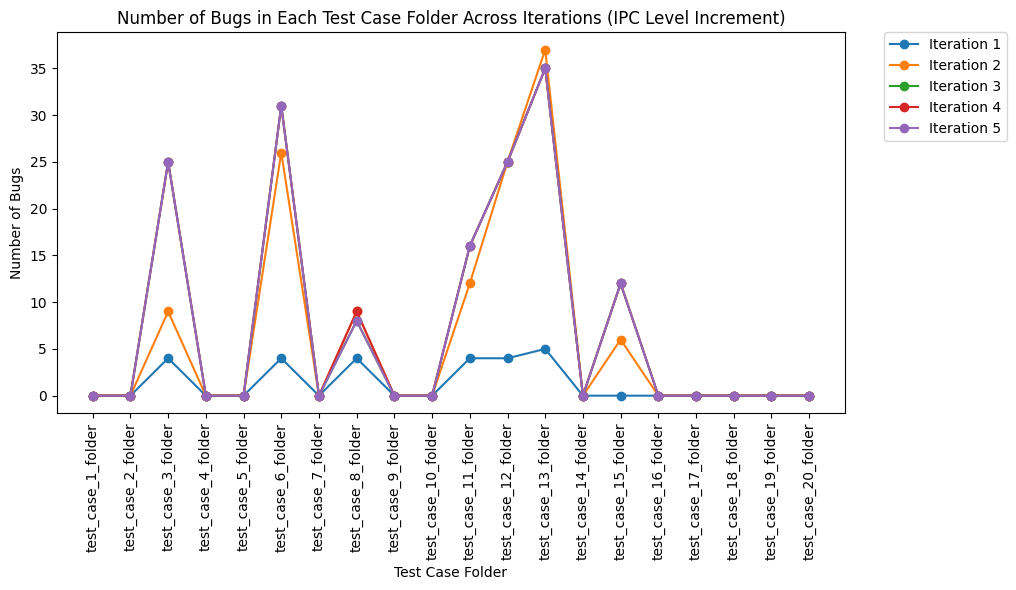

--------------------------------------------------
Initial parameters: 1, 1, 65
Running iteration 1 with parameters: 1, 1, 65
Running iteration 2 with parameters: 1, 2, 65
Running iteration 3 with parameters: 1, 3, 65
Running iteration 4 with parameters: 1, 4, 65
Running iteration 5 with parameters: 1, 5, 65
All test cases have 0 bugs in iteration 5. Stopping further iterations.
Chart saved to: /results


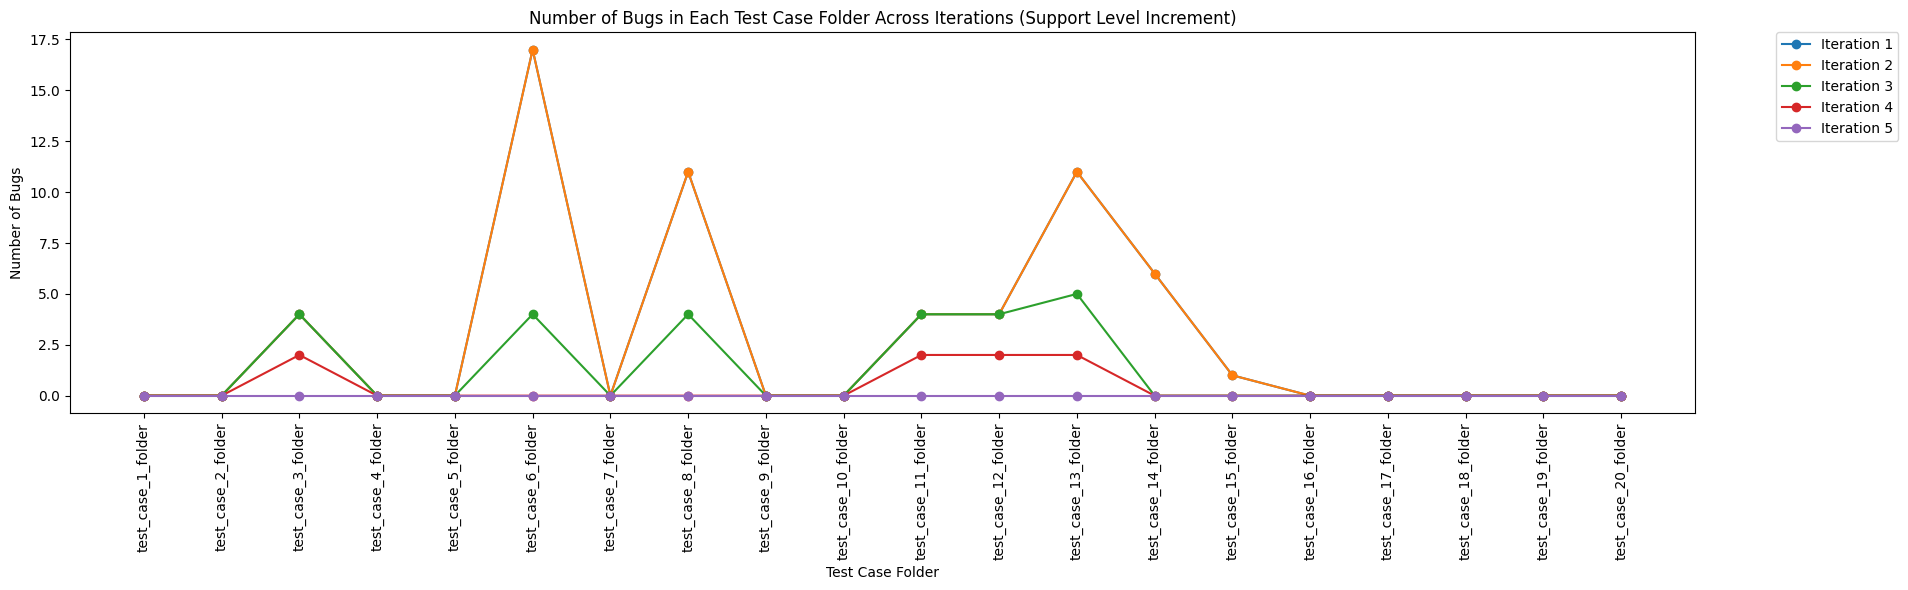

--------------------------------------------------
Initial parameters: 1, 3, 5
Running iteration 1 with parameters: 1, 3, 5
Running iteration 2 with parameters: 1, 3, 10
Running iteration 3 with parameters: 1, 3, 15
Running iteration 4 with parameters: 1, 3, 20
Running iteration 5 with parameters: 1, 3, 25
Running iteration 6 with parameters: 1, 3, 30
Running iteration 7 with parameters: 1, 3, 35
Running iteration 8 with parameters: 1, 3, 40
Running iteration 9 with parameters: 1, 3, 45
Running iteration 10 with parameters: 1, 3, 50
Running iteration 11 with parameters: 1, 3, 55
Running iteration 12 with parameters: 1, 3, 60
Running iteration 13 with parameters: 1, 3, 65
Running iteration 14 with parameters: 1, 3, 70
Running iteration 15 with parameters: 1, 3, 75
Running iteration 16 with parameters: 1, 3, 80
Running iteration 17 with parameters: 1, 3, 85
All test cases have 0 bugs in iteration 17. Stopping further iterations.
Chart saved to: /results


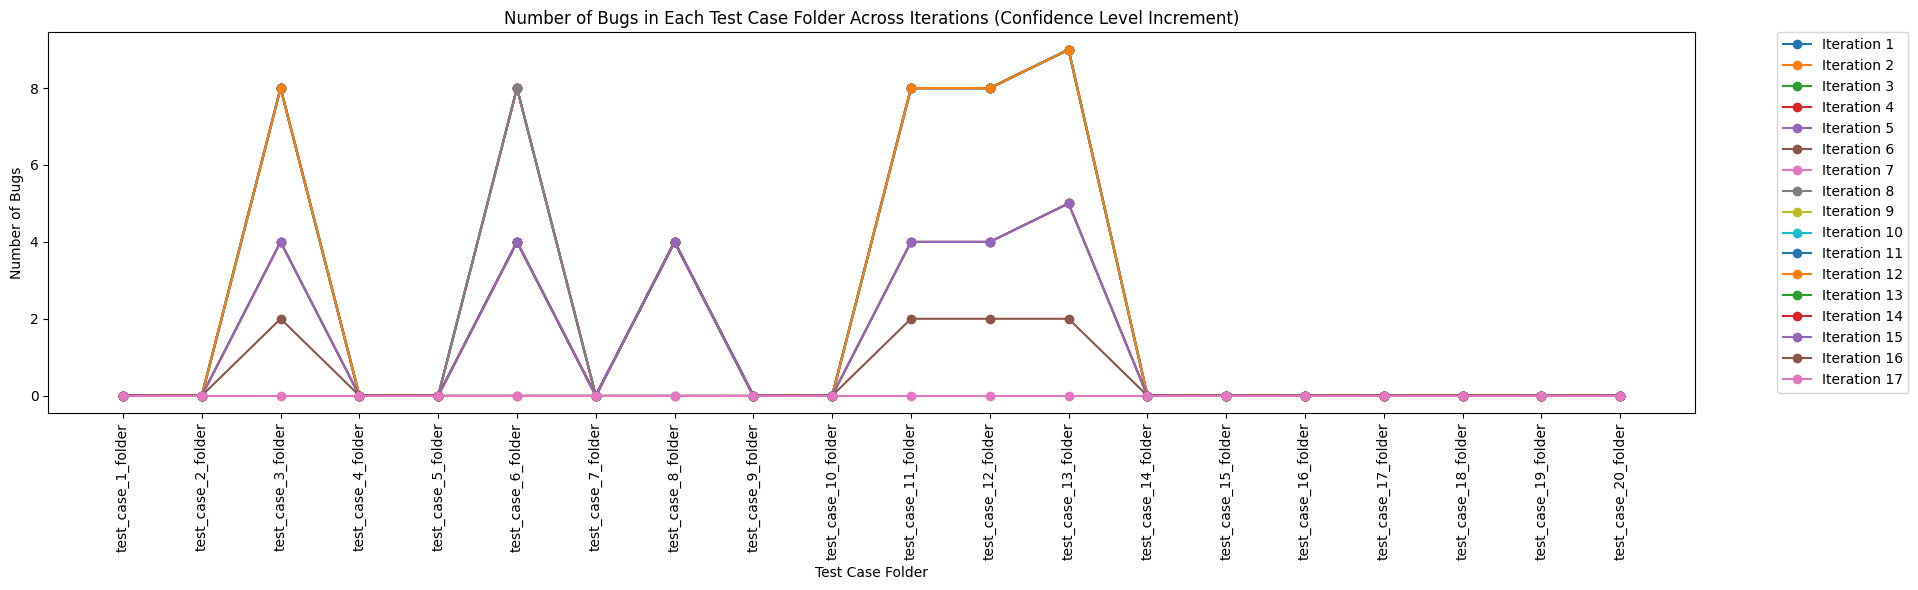

In [2]:
#    This script is used to generate 3 random parameters 
#    as command line arguments for the operate_script.sh script.
#    It will then run the script with these parameters to 
#    generate the output files in each test case folder.
#    After that, it will read the output files and
#    extract the number of bugs specified in the output files.
#    Then it will plot the number of bugs in each test case folder.

# import necessary libraries
import os
import random
import subprocess
import matplotlib.pyplot as plt

# Set the current working directory
current_dir = "/home/shanghuang/Documents/Code related/SoftwareBugDetectionUsingCallGraphReferences/recreate"
# Change the current working directory to the script's directory
os.chdir(current_dir)

# Script running command
script_command = "./operate_script.sh"

# Folder path to the test cases
test_cases_dir = current_dir + "/test_cases"

# Folder path to the results
# Create the results directory if it does not exist
results_dir = current_dir + "/results"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Generate 3 random parameters
def generate_random_parameters():
    # Generate 3 random parameters
    param1 = random.randint(1, 10)
    param2 = random.randint(1, 30)
    param3 = random.randint(0, 100)
    return param1, param2, param3

# Run the script with the parameters
def run_script(param1, param2, param3):

    # Run the script with the parameters
    subprocess.run([
        "bash",
        str(script_command), 
        str(param1), 
        str(param2), 
        str(param3)
    ])

    

# Read the generated_callgraph.out output files 
# in each test case folder
# and extract the number of bugs
def read_output_files():
    # List to store the number of bugs in each test case folder
    bugs_count = []
    # Loop through each test case folder
    for test_case in os.listdir(test_cases_dir):
        # Path to the generated_callgraph.out file
        output_file_path = os.path.join(test_cases_dir, test_case, "generated_callgraph.out")
        # Check if the file exists
        if os.path.exists(output_file_path):
            # Read the file and extract the number of bugs 
            # Bug is sepecified by the line "bug may appear"
            with open(output_file_path, "r") as file:
                lines = file.readlines()

                # Jump to the line that contains "bug may appear"
                # and count the number of lines that contain "bug may appear"
                

                # Count the number of lines that contain "bug may appear"
                count = sum(1 for line in lines if "bug" in line)
                
                # Check if count is 0 then append 0 to the list and skip the rest
                if count == 0:
                    bugs_count.append(0)
                    continue

                # Check if the bug pair contains hidden methods
                # If the bug pair contains hidden methods, decrement the count
                # Only need to check if the pattern contains in line
                for line in lines:
                    if "bug" in line:
                        # Check if line contains pattern "::" or "__"
                        if "::" in line or "__" in line:
                            # Decrement the count
                            count -= 1
                bugs_count.append(count)

            # Check if the bug pair contains hidden methods
            # If the bug pair contains hidden methods, decrement the count

        else:
            # If the file does not exist, append 0 to the list
            bugs_count.append(0)
    return bugs_count

# Plot the number of bugs in each test case folder
def plot_bugs_count(bugs_count):
    # Plot the number of bugs in each test case folder
    plt.bar(range(len(bugs_count)), bugs_count)
    plt.xlabel("Test Case Folder")
    plt.ylabel("Number of Bugs")
    plt.title("Number of Bugs in Each Test Case Folder")
    plt.xticks(range(len(bugs_count)), os.listdir(test_cases_dir), rotation=90)
    plt.tight_layout()
    plt.show()

    # Plot the number of bugs in each test case folder
    plt.plot(range(len(bugs_count)), bugs_count, marker='o')
    plt.xlabel("Test Case Folder")
    plt.ylabel("Number of Bugs")
    plt.title("Number of Bugs in Each Test Case Folder")
    plt.xticks(range(len(bugs_count)), os.listdir(test_cases_dir), rotation=90)
    plt.tight_layout()
    plt.show()

# Function to package the workflow for random parameters method
def package_workflow_random_parameter():
    # Generate random parameters
    param1, param2, param3 = generate_random_parameters()
    print(f"Generated parameters: {param1}, {param2}, {param3}")
    
    # Run the script with the parameters
    run_script(param1, param2, param3)
    
    # Read the output files and extract the number of bugs
    bugs_count = read_output_files()
    
    # Plot the number of bugs in each test case folder
    plot_bugs_count(bugs_count)

# Function to package the workflow for ipc level increment method
def package_workflow_ipc_level_increment():
    # Define the selected parameters
    param1 = 1  # This parameter is selected to increment the IPC_LEVEL
    param2 = 3
    param3 = 65
    print(f"Initial parameters: {param1}, {param2}, {param3}")

    # Dictionary to store bugs count for each iteration
    iterations_bugs_count = {}

    # Loop through 5 iterations
    for iteration in range(1, 6):
        print(f"Running iteration {iteration} with parameters: {param1}, {param2}, {param3}")
        
        # Run the script with the current parameters
        run_script(param1, param2, param3)
        
        # Read the output files and extract the number of bugs
        bugs_count = read_output_files()
        
        # Store the bugs count for this iteration
        iterations_bugs_count[f"Iteration {iteration}"] = bugs_count
        
        # Increment param1 for the next iteration
        param1 += 1

        # If all test cases have 0 bugs, stop further iterations
        # Check if all counts are zero
        if all(count == 0 for count in bugs_count):
            print(f"All test cases have 0 bugs in iteration {iteration}. Stopping further iterations.")
            break

    # Plot the results as a line chart
    plt.figure(figsize=(10, 6))
    for iteration, bugs_count in iterations_bugs_count.items():
        plt.plot(range(len(bugs_count)), bugs_count, marker='o', label=iteration)

    # Configure the chart
    plt.xlabel("Test Case Folder")
    plt.ylabel("Number of Bugs")
    plt.title("Number of Bugs in Each Test Case Folder Across Iterations (IPC Level Increment)")
    plt.xticks(range(len(bugs_count)), os.listdir(test_cases_dir), rotation=90)
    plt.legend()
    plt.tight_layout()

    # Edit the legend to be outside the chart
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.subplots_adjust(right=0.85)

    # Save the chart to the results directory
    chart_path = os.path.join(results_dir, "bugs_count_iterations_chart_ipc_increment.png")
    plt.savefig(chart_path)
    
    # Shorten the chart path for display
    chart_path = os.path.abspath(chart_path)
    print(f"Chart saved to: /results")

    # Show the chart
    plt.show()

# Function to package the workflow for support increment
def package_workflow_support_level_increment():
    # Define the selected parameters
    param1 = 1  
    param2 = 1 # This parameter is selected to increment the SUPPORT_LEVEL
    param3 = 65
    print(f"Initial parameters: {param1}, {param2}, {param3}")

    # Dictionary to store bugs count for each iteration
    iterations_bugs_count = {}

    # Loop through 21 iterations
    for iteration in range(1, 21):
        print(f"Running iteration {iteration} with parameters: {param1}, {param2}, {param3}")
        
        # Run the script with the current parameters
        run_script(param1, param2, param3)
        
        # Read the output files and extract the number of bugs
        bugs_count = read_output_files()
        
        # Store the bugs count for this iteration
        iterations_bugs_count[f"Iteration {iteration}"] = bugs_count
        
        # Increment param1 for the next iteration
        param2 += 1

        # If all test cases have 0 bugs, stop further iterations
        # Check if all counts are zero
        if all(count == 0 for count in bugs_count):
            print(f"All test cases have 0 bugs in iteration {iteration}. Stopping further iterations.")
            break

    # Plot the results as a line chart
    plt.figure(figsize=(20, 6))
    for iteration, bugs_count in iterations_bugs_count.items():
        plt.plot(range(len(bugs_count)), bugs_count, marker='o', label=iteration)

    # Configure the chart
    plt.xlabel("Test Case Folder")
    plt.ylabel("Number of Bugs")
    plt.title("Number of Bugs in Each Test Case Folder Across Iterations (Support Level Increment)")
    plt.xticks(range(len(bugs_count)), os.listdir(test_cases_dir), rotation=90)
    plt.legend()
    plt.tight_layout()
    
    # Edit the legend to be outside the chart
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.subplots_adjust(right=0.85)



    # Save the chart to the results directory
    chart_path = os.path.join(results_dir, "bugs_count_iterations_chart_support_increment.png")
    plt.savefig(chart_path)

    # Shorten the chart path for display
    chart_path = os.path.abspath(chart_path)
    print(f"Chart saved to: /results")

    # Show the chart
    plt.show()

# Function to package the workflow for confidence increment
def package_workflow_confidence_level_increment():
    # Define the selected parameters
    param1 = 1  
    param2 = 3 
    param3 = 5 # This parameter is selected to increment the CONFIDENCE_LEVEL
    print(f"Initial parameters: {param1}, {param2}, {param3}")

    # Dictionary to store bugs count for each iteration
    iterations_bugs_count = {}

    # Loop through 21 iterations
    for iteration in range(1, 21):
        print(f"Running iteration {iteration} with parameters: {param1}, {param2}, {param3}")
        
        # Run the script with the current parameters
        run_script(param1, param2, param3)
        
        # Read the output files and extract the number of bugs
        bugs_count = read_output_files()
        
        # Store the bugs count for this iteration
        iterations_bugs_count[f"Iteration {iteration}"] = bugs_count
        
        # Increment param1 for the next iteration
        param3 += 5

        # If all test cases have 0 bugs, stop further iterations
        # Check if all counts are zero
        if all(count == 0 for count in bugs_count):
            print(f"All test cases have 0 bugs in iteration {iteration}. Stopping further iterations.")
            break

    # Plot the results as a line chart
    plt.figure(figsize=(20, 6))
    for iteration, bugs_count in iterations_bugs_count.items():
        plt.plot(range(len(bugs_count)), bugs_count, marker='o', label=iteration)

    # Configure the chart
    plt.xlabel("Test Case Folder")
    plt.ylabel("Number of Bugs")
    plt.title("Number of Bugs in Each Test Case Folder Across Iterations (Confidence Level Increment)")
    plt.xticks(range(len(bugs_count)), os.listdir(test_cases_dir), rotation=90)
    plt.legend()
    plt.tight_layout()
    
    # Edit the legend to be outside the chart
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.subplots_adjust(right=0.85)



    # Save the chart to the results directory
    chart_path = os.path.join(results_dir, "bugs_count_iterations_chart_confidence_iteration.png")
    plt.savefig(chart_path)

    # Shorten the chart path for display
    chart_path = os.path.abspath(chart_path)
    print(f"Chart saved to: /results")

    # Show the chart
    plt.show()

# Main function
def main():
    # Package the workflow for random parameters method
    # package_workflow()

    print("--------------------------------------------------")
    # Package the workflow for ipc level increment method
    package_workflow_ipc_level_increment()

    print("--------------------------------------------------")
    # Package the workflow for support increment method
    package_workflow_support_level_increment()

    print("--------------------------------------------------")
    # Package the workflow for confidence increment method
    package_workflow_confidence_level_increment()


if __name__ == "__main__":
    main()